# Project Description

Dream Housing Finance specializes in various home loans, operating in urban, semi-urban, and rural areas. The Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. This notebook utilizes the dataset provided by Dream Housing Finance, focusing on data from four counties in Kenya. Key goals include understanding loan distribution across counties and demographics, assessing the national representativeness of borrowers, examining the evolution of the loan book over time, identifying distinct borrower groups, exploring factors influencing funding, and providing recommendations for enhancing data collection to improve monitoring and learning from loans.

In [2]:
# To start working with the dataset, we will import the following libraries

import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for basic data visualization
import seaborn as sns  # Seaborn for advanced data visualization
from sklearn.cluster import KMeans  # KMeans for clustering
from sklearn.preprocessing import StandardScaler  # StandardScaler for feature scaling
from sklearn.model_selection import train_test_split  # Train-test split for model evaluation
from sklearn.linear_model import LogisticRegression  # Logistic Regression for classification
from sklearn.metrics import f1_score, confusion_matrix  # Metrics for model evaluation
from sklearn.svm import SVC  # Support Vector Classifier for classification
import warnings  # Warnings to suppress unnecessary warnings
warnings.filterwarnings("ignore")

## Loading the date into our environment

In [3]:
# Provide the path to the Excel file
file_path = r'F:\Projects\Loan_Analysis_Project\Kenya_Loan_Analysis_Project'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify the import
df.head()


,Loan_ID,Gender,age,Married,Dependents,county,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,application_date,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,22,No,0,Nairobi,Graduate,No,5849,0.0,NaN,29/08/2017,360.0,1.0,Urban,Y
1,LP001003,Male,31,Yes,1,Kiambu,Graduate,No,4583,1508.0,128.0,29/06/2017,360.0,1.0,Rural,N
2,LP001005,Male,43,Yes,0,Machakos,Graduate,Yes,3000,0.0,66.0,21/11/2017,360.0,1.0,Urban,Y
3,LP001006,Male,37,Yes,0,Kiambu,Not Graduate,No,2583,2358.0,120.0,22/08/2018,360.0,1.0,Urban,Y
4,LP001008,Male,36,No,0,Mombasa,Graduate,No,6000,0.0,141.0,15/01/2018,360.0,1.0,Urban,Y


## Understanding the Data

In [109]:
df.dtypes

Loan_ID               object
Gender                object
age                    int64
Married               object
Dependents            object
county                object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
application_date      object
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- We can see there are three formats of data types:

  - **object:** Categorical variables in our dataset i.e: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan Status.

  - **int64:** It represents the integer variables i.e: age. ApplicantIncome is of this format.

  - **float64:** It represents the variables that have some decimal values involved. They are also numerical variables.

- Numerical variables in our dataset are: Coapplicantincome, LoanAmount, Loan_Amount_Term, and Credit_History.


In [110]:
df.shape

(614, 16)

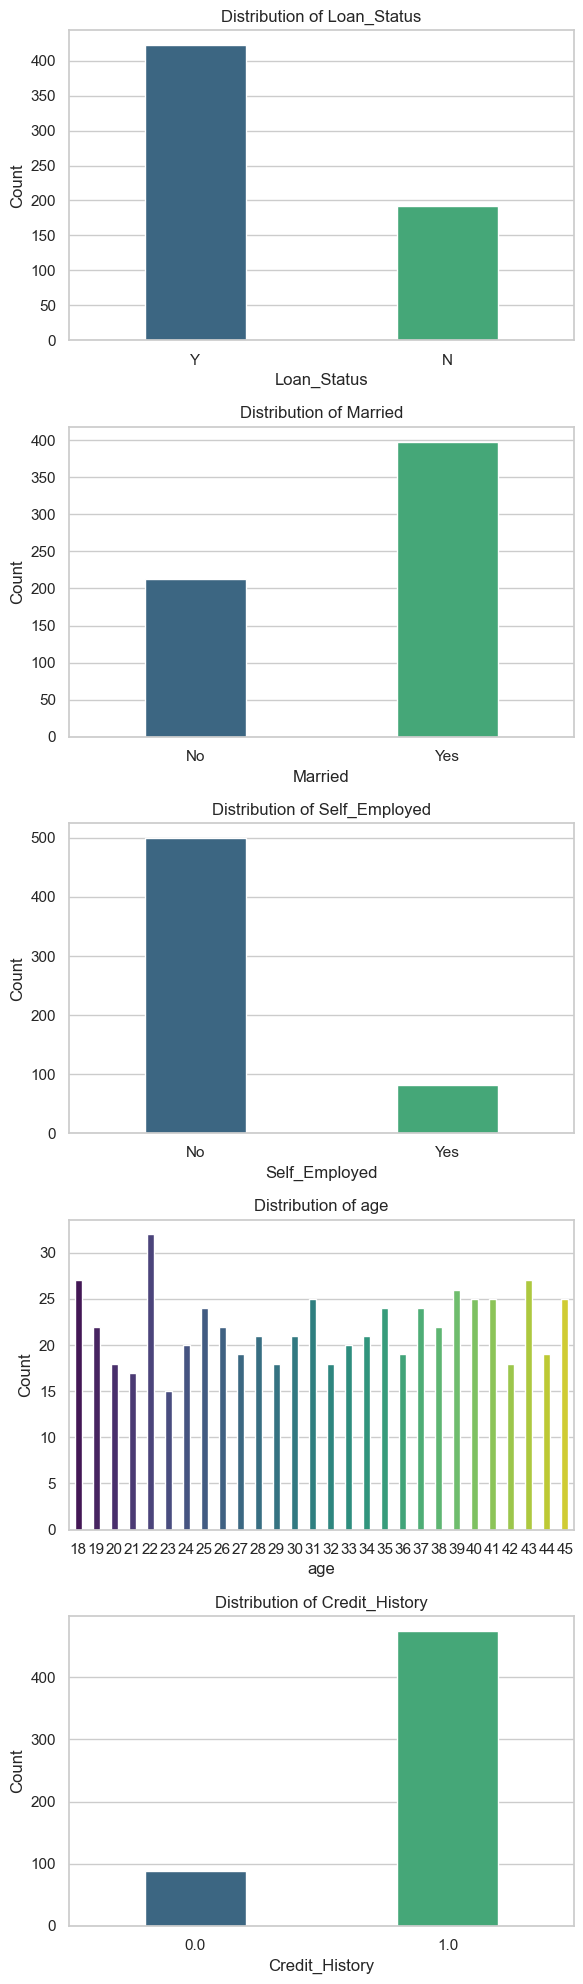

In [122]:
# Let's visualize the categorical and ordinal features.

# The Dataset containing the categorical columns
parameters = ['Loan_Status', 'Married', 'Self_Employed', 'age','Credit_History']

# Create subplots for each parameter
fig, axes = plt.subplots(nrows=len(parameters), ncols=1, figsize=(6, 4 * len(parameters)))

# Specify the bar width
bar_width = 0.4

for i, param in enumerate(parameters):
    sns.countplot(x=param, data=df, palette='viridis', ax=axes[i], width=bar_width)
    axes[i].set_title(f'Distribution of {param}')
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

From the baove graphs, we can deduce the following:

- The loan of 422 (around 69%) people out of 614 was approved.
- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self-employed.
- Around 85% applicants have repaid their debts.
- Age 22 seems to be the most frequent age in the dataset.

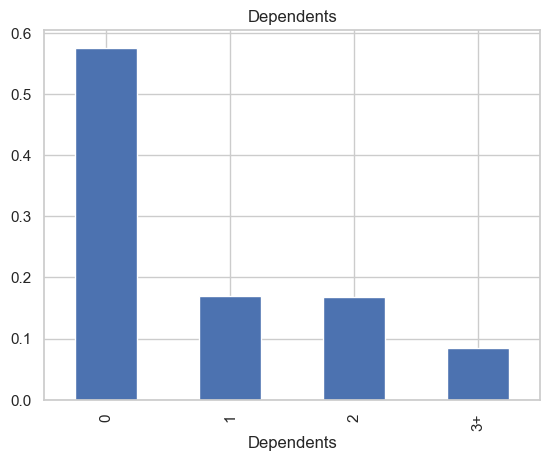

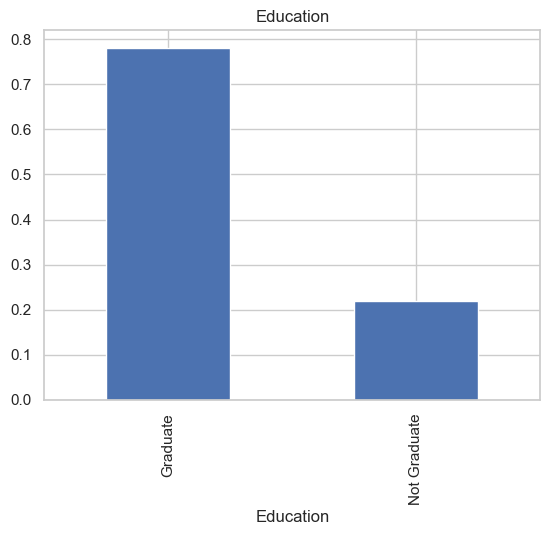

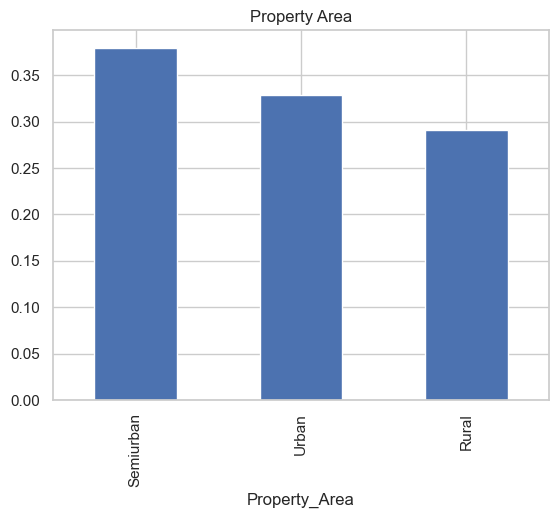

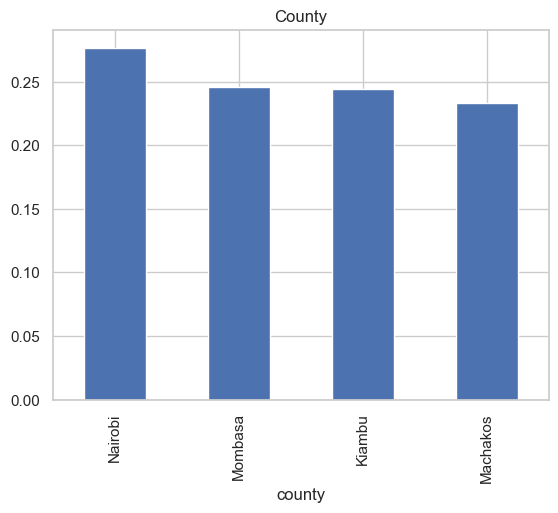

In [123]:
# Now let's visualize the ordinal variables.

# Plotting 'Dependents'
df['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")
plt.show()

# Plotting 'Education'
df['Education'].value_counts(normalize=True).plot.bar(title="Education")
plt.show()

# Plotting 'Property_Area'
df['Property_Area'].value_counts(normalize=True).plot.bar(title="Property Area")
plt.show()

# Plotting 'county'
df['county'].value_counts(normalize=True).plot.bar(title="County")
plt.show()

From the above graphs, we can deduce that:

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduates.
- Most of the applicants are from a semiurban area.
- Nairobi county has the highest number of applicants.

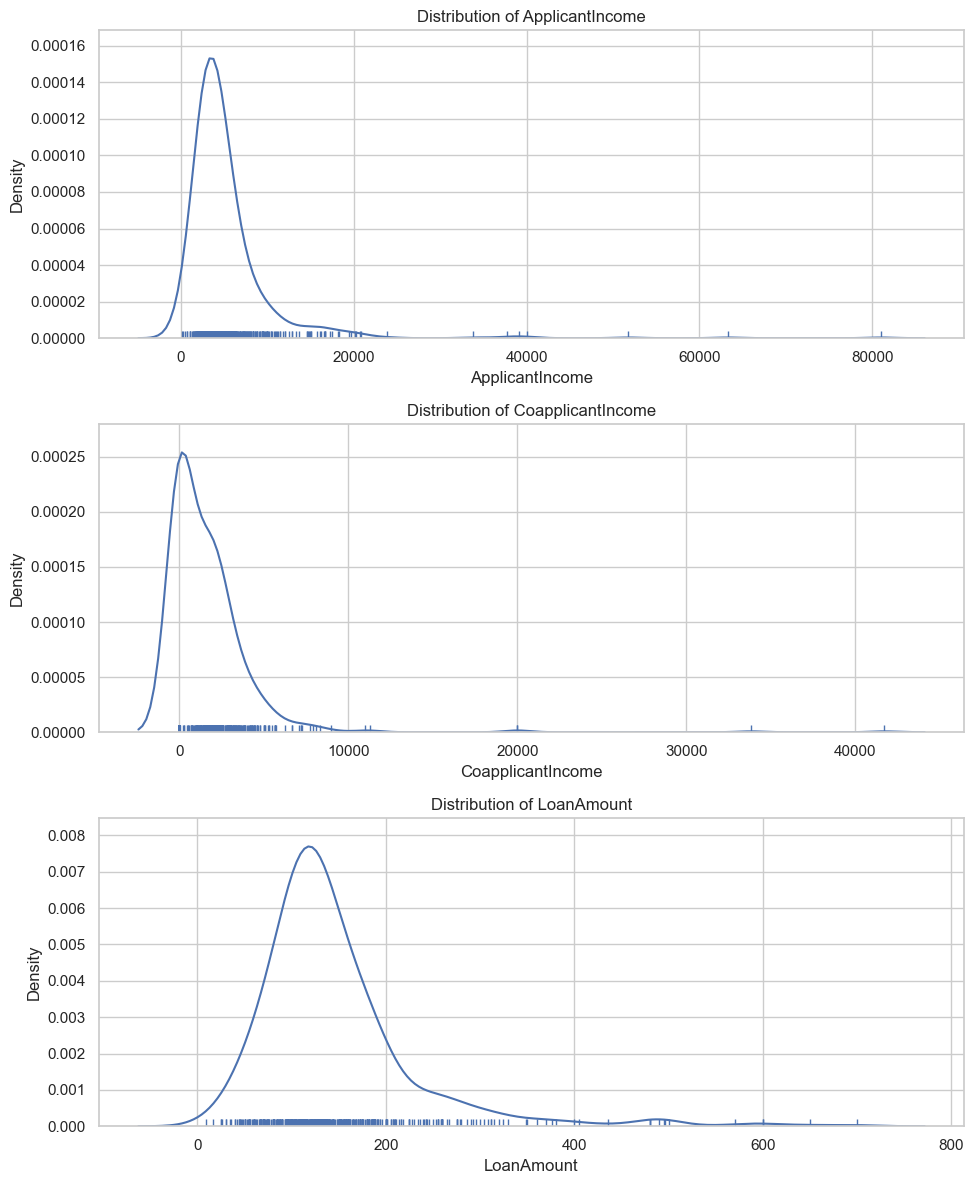

In [126]:
# Finally lets visualize the numerical variables

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plot for ApplicantIncome
sns.distplot(df['ApplicantIncome'], hist=False, rug=True, label='ApplicantIncome', ax=axes[0])
axes[0].set_title('Distribution of ApplicantIncome')

# Plot for CoapplicantIncome
sns.distplot(df['CoapplicantIncome'], hist=False, rug=True, label='CoapplicantIncome', ax=axes[1])
axes[1].set_title('Distribution of CoapplicantIncome')

# Plot for LoanAmount
sns.distplot(df['LoanAmount'], hist=False, rug=True, label='LoanAmount', ax=axes[2])
axes[2].set_title('Distribution of LoanAmount')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

From the above plots, we can deduce that:

- Most of the data in the distribution of applicant income is towards the left, suggesting non-normal distribution.
- Significant outliers are observed in the coapplicant income, and it deviates from a normal distribution.
- The distribution of Loan Amount exhibits several outliers, but it is relatively normal.

## Cleaning the Data

In [37]:
# Missing Values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

Loan_ID               0
Gender               13
age                   0
Married               3
Dependents           15
county                0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
application_date      0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [39]:
# Since the dataset seems relatively small (615 observations), dropping rows can lead to a substantial loss of information.
# Hence we will fill missing values in categorical columns with the mode (most frequent value) 
# and in numerical columns with the median


# Define columns with missing values
columns_with_missing = ['Gender', 'Married', 'Dependents', 'Self_Employed',
                         'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Impute missing values for categorical columns with the mode
for col in columns_with_missing:
    if df[col].dtype == 'O':  # 'O' indicates object data type (categorical)
        df[col].fillna(df[col].mode()[0], inplace=True)

# Impute missing values for numerical columns with the median
for col in columns_with_missing:
    if df[col].dtype != 'O':  # Not categorical (numerical)
        df[col].fillna(df[col].median(), inplace=True)

# Display the cleaned DataFrame
df.head(10)

,Loan_ID,Gender,age,Married,Dependents,county,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,application_date,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,22,No,0,Nairobi,Graduate,No,5849,0.0,128.0,29/08/2017,360.0,1.0,Urban,Y
1,LP001003,Male,31,Yes,1,Kiambu,Graduate,No,4583,1508.0,128.0,29/06/2017,360.0,1.0,Rural,N
2,LP001005,Male,43,Yes,0,Machakos,Graduate,Yes,3000,0.0,66.0,21/11/2017,360.0,1.0,Urban,Y
3,LP001006,Male,37,Yes,0,Kiambu,Not Graduate,No,2583,2358.0,120.0,22/08/2018,360.0,1.0,Urban,Y
4,LP001008,Male,36,No,0,Mombasa,Graduate,No,6000,0.0,141.0,15/01/2018,360.0,1.0,Urban,Y
5,LP001011,Male,33,Yes,2,Machakos,Graduate,Yes,5417,4196.0,267.0,2018-02-11 00:00:00,360.0,1.0,Urban,Y
6,LP001013,Male,43,Yes,0,Nairobi,Not Graduate,No,2333,1516.0,95.0,26/04/2018,360.0,1.0,Urban,Y
7,LP001014,Male,32,Yes,3+,Kiambu,Graduate,No,3036,2504.0,158.0,2017-07-01 00:00:00,360.0,0.0,Semiurban,N
8,LP001018,Male,22,Yes,2,Nairobi,Graduate,No,4006,1526.0,168.0,26/08/2017,360.0,1.0,Urban,Y
9,LP001020,Male,26,Yes,1,Mombasa,Graduate,No,12841,10968.0,349.0,26/12/2018,360.0,1.0,Semiurban,N


In [42]:
# Next we Convert the 'application_date' column to a consistent date format.

# Convert 'application_date' column to datetime format with dayfirst=True
df['application_date'] = pd.to_datetime(df['application_date'], dayfirst=True, errors='coerce')


# Display the DataFrame to verify the changes
df.head(10)

,Loan_ID,Gender,age,Married,Dependents,county,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,application_date,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,22,No,0,Nairobi,Graduate,No,5849,0.0,128.0,2017-08-29,360.0,1.0,Urban,Y
1,LP001003,Male,31,Yes,1,Kiambu,Graduate,No,4583,1508.0,128.0,2017-06-29,360.0,1.0,Rural,N
2,LP001005,Male,43,Yes,0,Machakos,Graduate,Yes,3000,0.0,66.0,2017-11-21,360.0,1.0,Urban,Y
3,LP001006,Male,37,Yes,0,Kiambu,Not Graduate,No,2583,2358.0,120.0,2018-08-22,360.0,1.0,Urban,Y
4,LP001008,Male,36,No,0,Mombasa,Graduate,No,6000,0.0,141.0,2018-01-15,360.0,1.0,Urban,Y
5,LP001011,Male,33,Yes,2,Machakos,Graduate,Yes,5417,4196.0,267.0,2018-02-11,360.0,1.0,Urban,Y
6,LP001013,Male,43,Yes,0,Nairobi,Not Graduate,No,2333,1516.0,95.0,2018-04-26,360.0,1.0,Urban,Y
7,LP001014,Male,32,Yes,3+,Kiambu,Graduate,No,3036,2504.0,158.0,2017-07-01,360.0,0.0,Semiurban,N
8,LP001018,Male,22,Yes,2,Nairobi,Graduate,No,4006,1526.0,168.0,2017-08-26,360.0,1.0,Urban,Y
9,LP001020,Male,26,Yes,1,Mombasa,Graduate,No,12841,10968.0,349.0,2018-12-26,360.0,1.0,Semiurban,N


## Analyzing the Data

In [44]:
# Summary statistics.

df.drop('application_date', axis=1).describe()

,age,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,31.701954,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,8.207391,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,18.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,25.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,32.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,39.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,45.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


### How are the loans distributed across counties and user demographics?

In [45]:
# To understand the distribution of loans across counties and user demographics, 
# we will generate the below statistics and visualizations.

# Summary statistics for loan distribution across counties
county_summary = df.groupby('county')['Loan_Status'].value_counts().unstack().fillna(0)
print("Loan Distribution Across Counties:")
print(county_summary)

# Summary statistics for loan distribution based on user demographics (e.g., Gender and Education)
gender_summary = df.groupby('Gender')['Loan_Status'].value_counts().unstack().fillna(0)
education_summary = df.groupby('Education')['Loan_Status'].value_counts().unstack().fillna(0)

print("\nLoan Distribution by Gender:")
print(gender_summary)

print("\nLoan Distribution by Education:")
print(education_summary)


Loan Distribution Across Counties:
Loan_Status   N    Y
county              
Kiambu       43  107
Machakos     49   94
Mombasa      43  108
Nairobi      57  113

Loan Distribution by Gender:
Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347

Loan Distribution by Education:
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


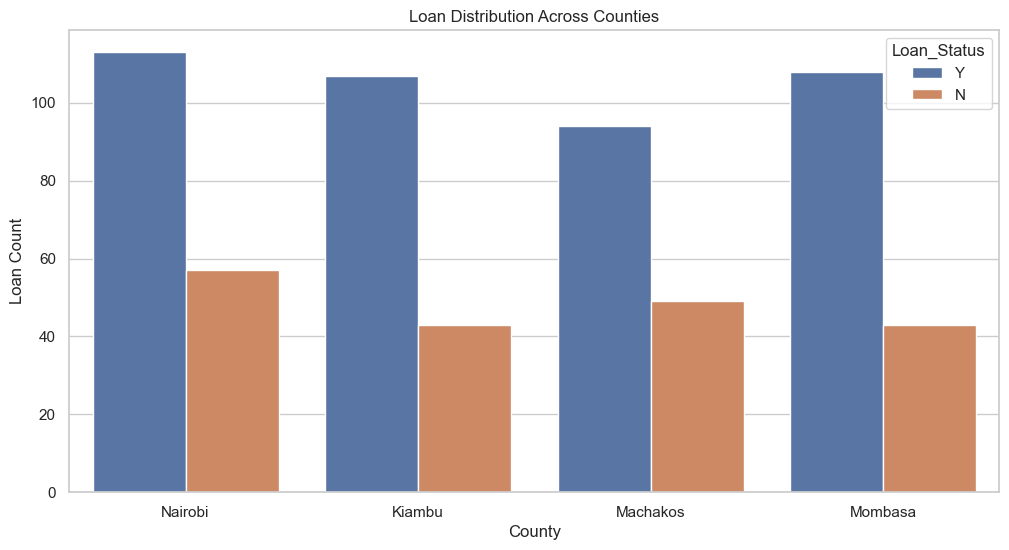

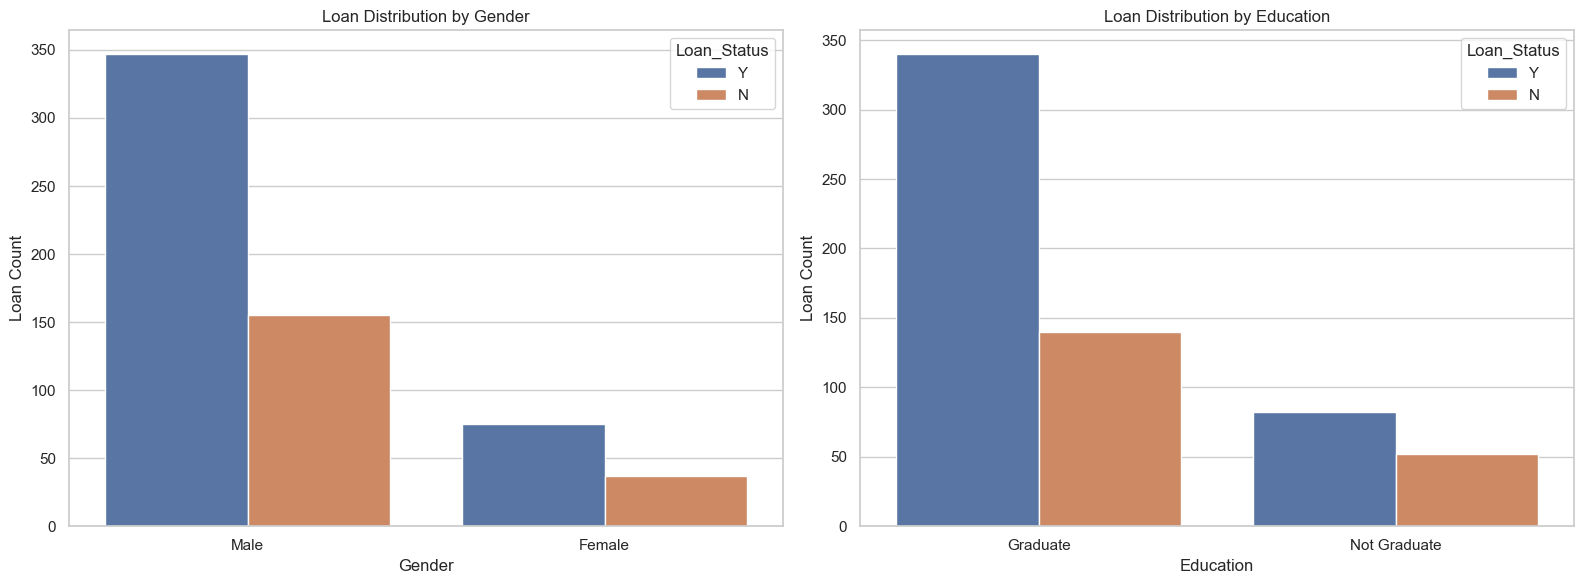

In [46]:
# The below visualizations will give insights into the distribution of loans
# and the approval status across different categories

# Visualize loan distribution across counties
plt.figure(figsize=(12, 6))
sns.countplot(x='county', data=df, hue='Loan_Status')
plt.title('Loan Distribution Across Counties')
plt.xlabel('County')
plt.ylabel('Loan Count')
plt.show()

# Visualize loan distribution based on user demographics (e.g., Gender and Education)
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df, hue='Loan_Status')
plt.title('Loan Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Education', data=df, hue='Loan_Status')
plt.title('Loan Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Loan Count')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

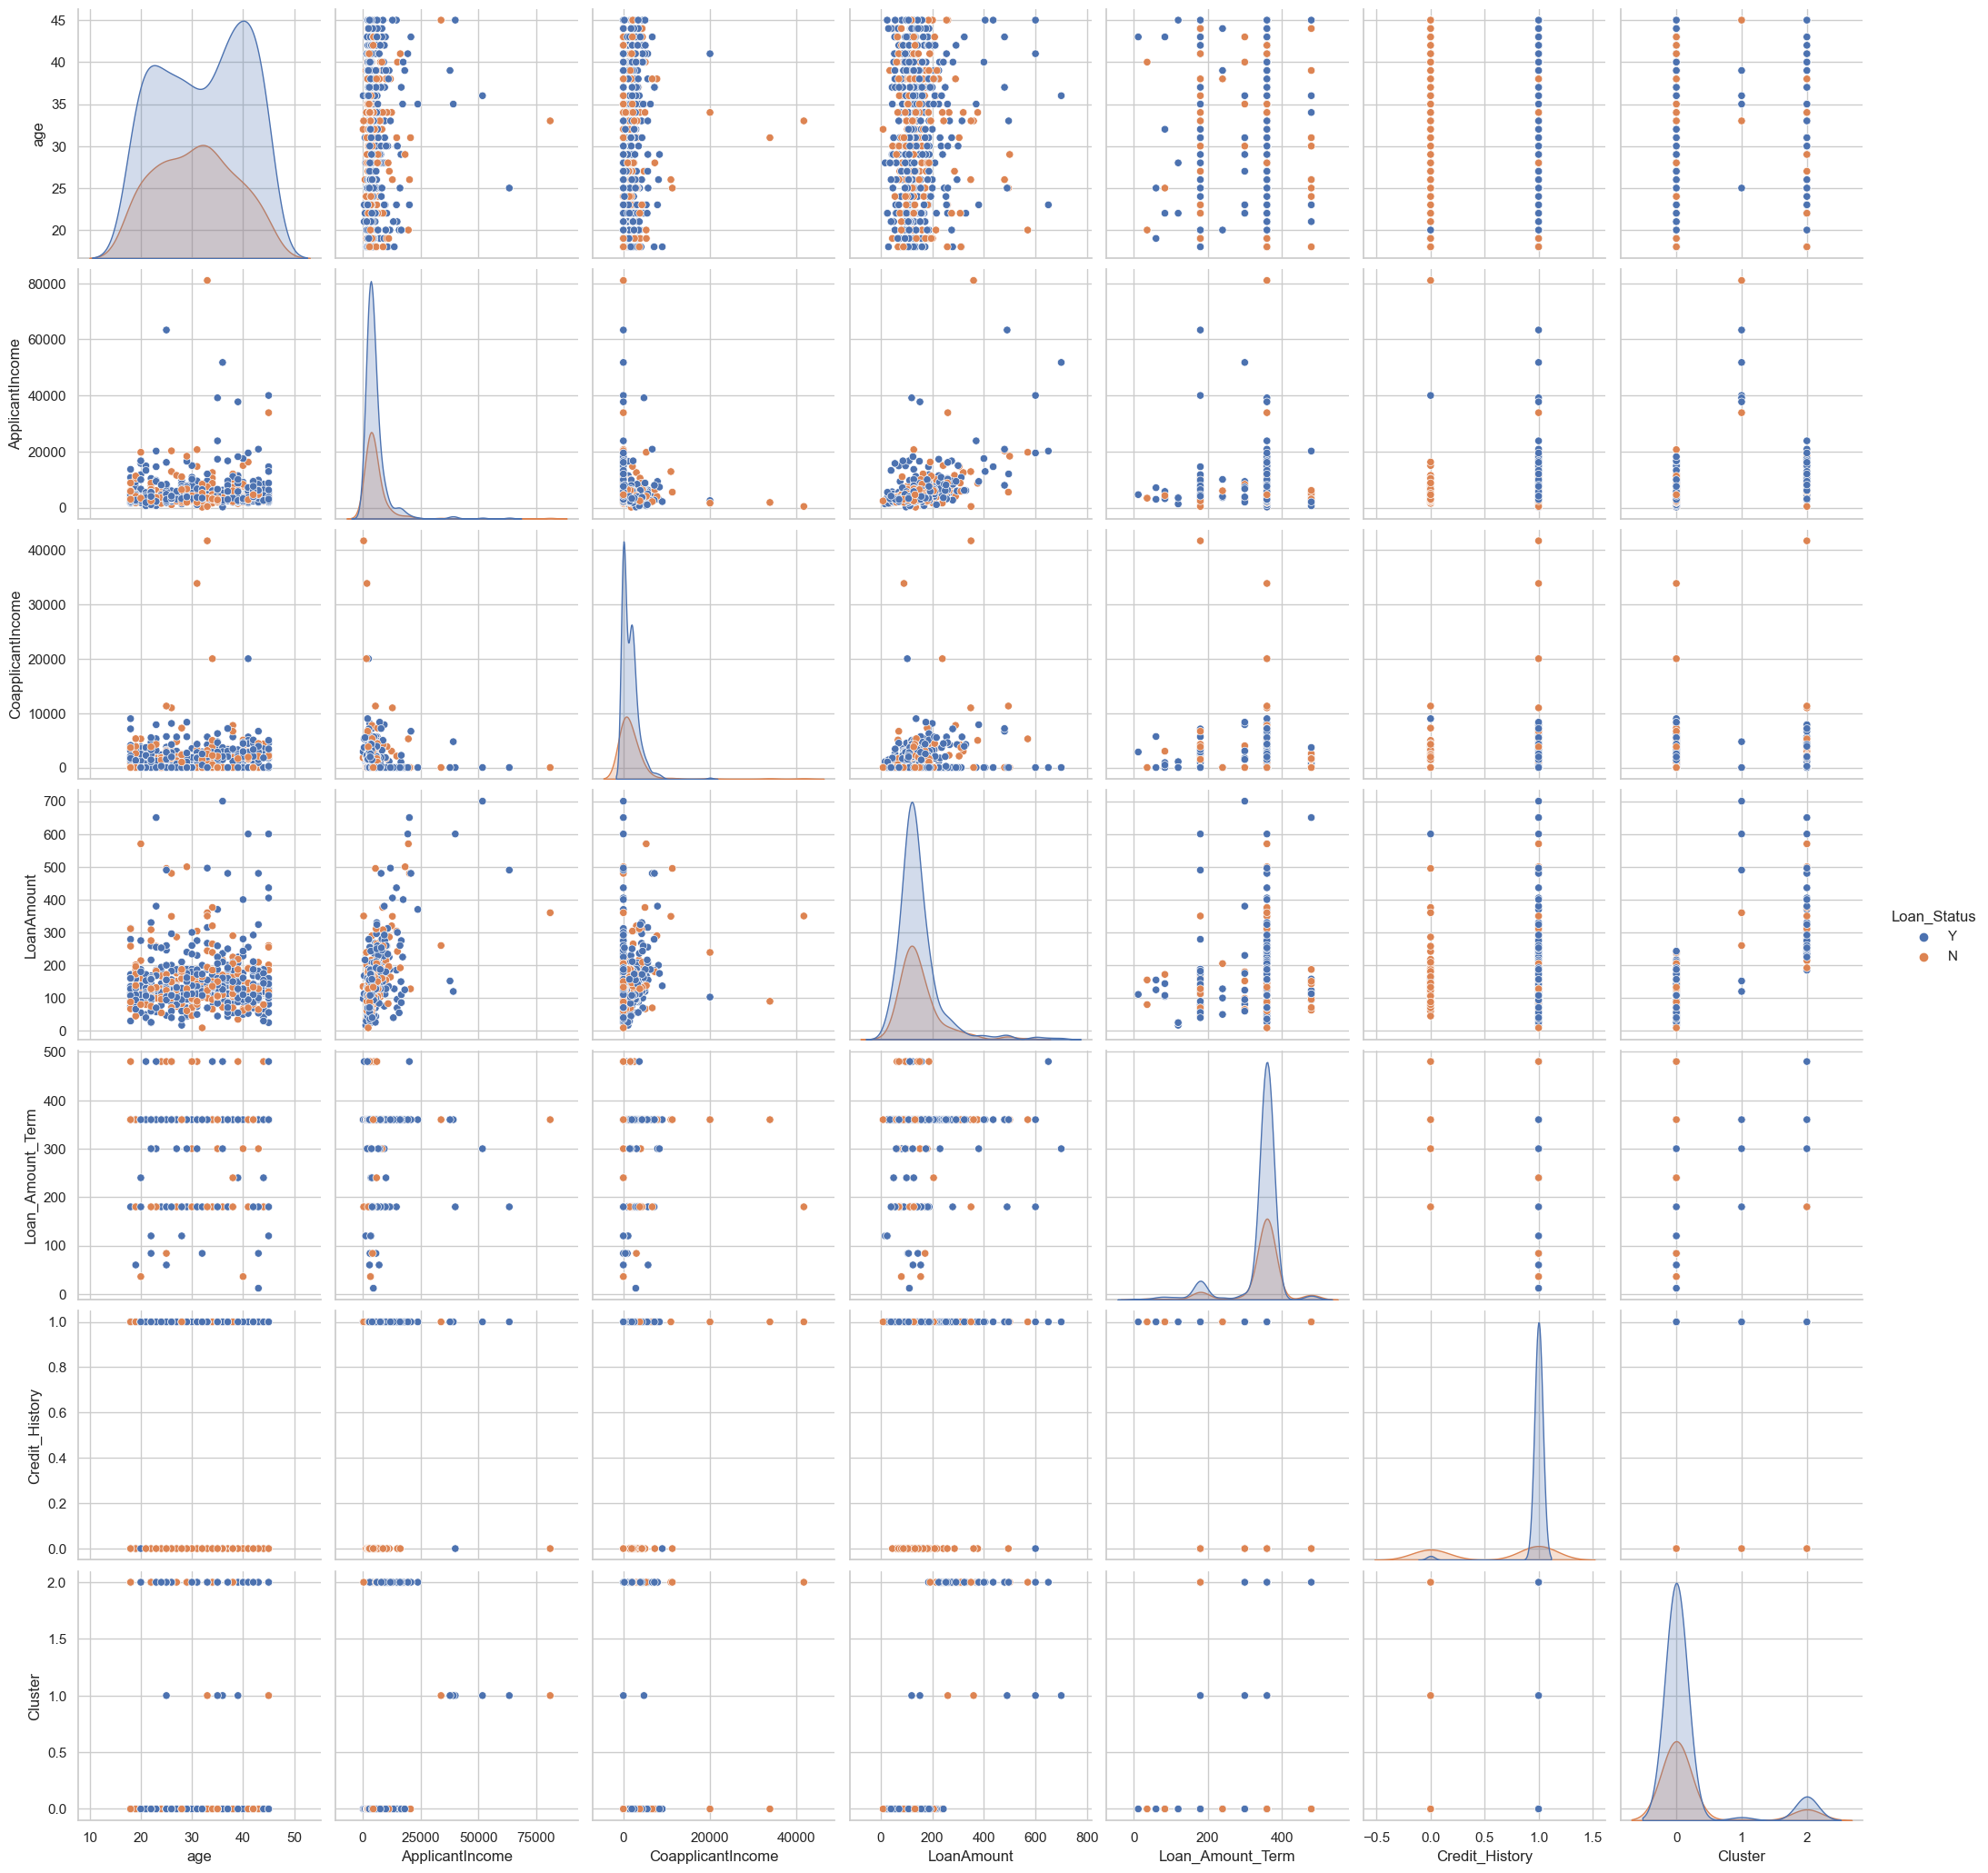

In [53]:
# The below generates a pair plot using the Seaborn library, visualizing the relationships between different 
# pairs of numerical variables in the dataset

# Set the style
sns.set(style="whitegrid")

# Create a pair plot
plt.figure(figsize=(12, 8))

# Adjusting the layout before creating the pair plot
plt.tight_layout()

sns.pairplot(df, hue="Loan_Status", height=3)

# Show the plot
plt.show()

### Do the Kenyan borrowers appear to be nationally representative?

To assess if Kenyan borrowers appear to be nationally representative, we will analyze the distribution of key categorical variables like "Gender," "Married," "Dependents," "county," "Education," "Self_Employed," "Credit_History," and "Property_Area."

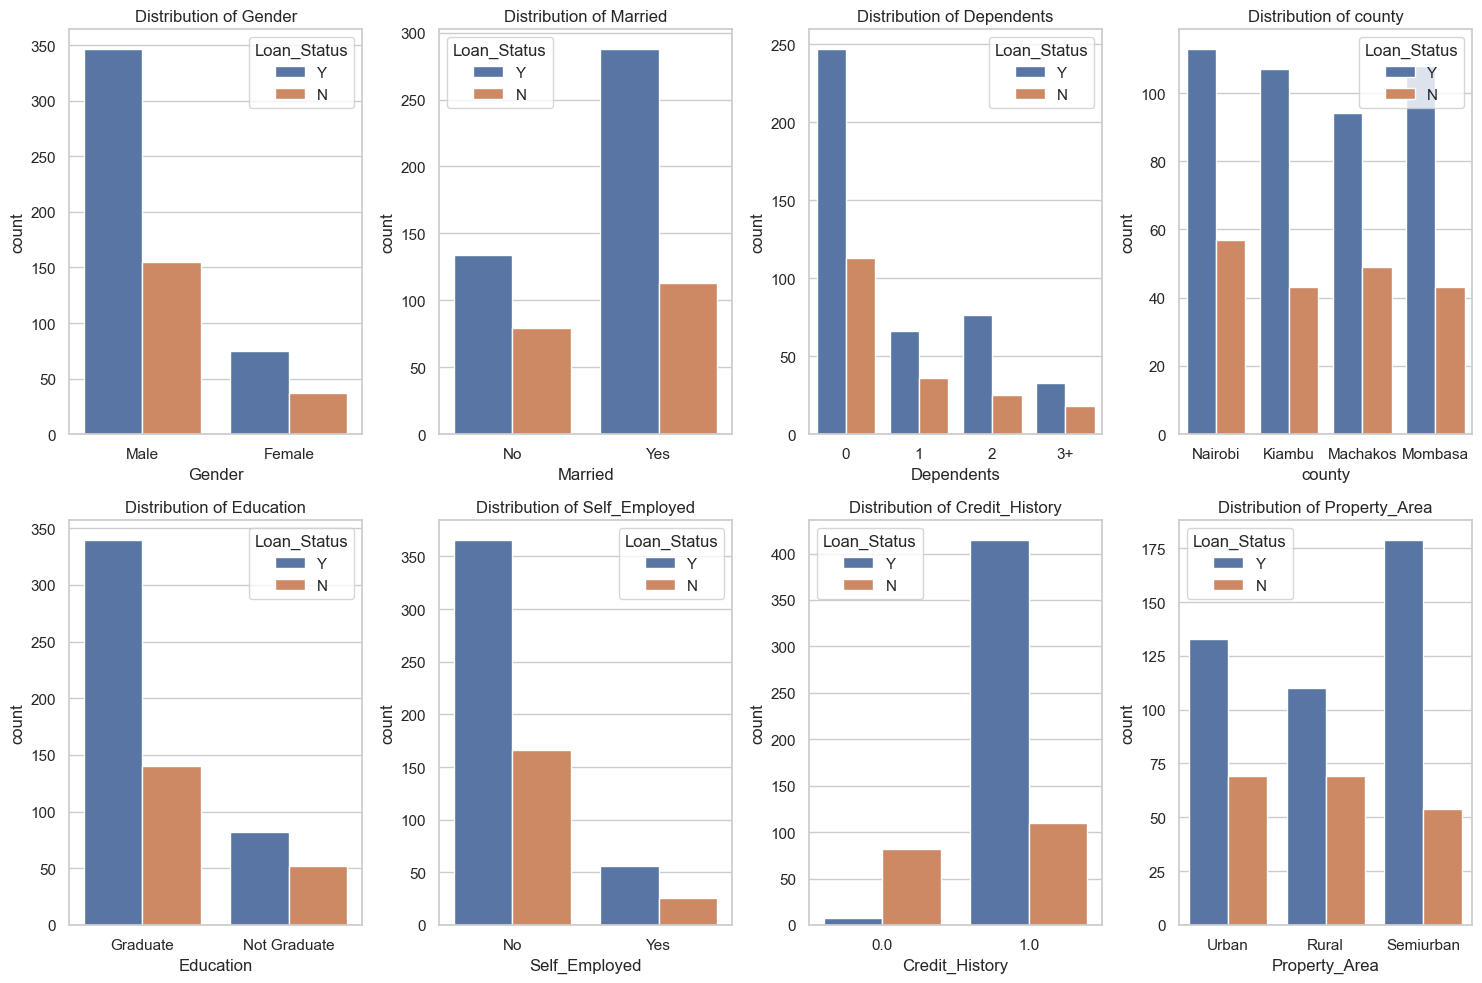

In [48]:
# This code will generate a set of count plots for each categorical variable, showcasing the distribution of 
# loan statuses (Y or N) among different categories.

# Set the style
sns.set(style="whitegrid")

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# Categorical variables to analyze
categorical_variables = ['Gender', 'Married', 'Dependents', 'county', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Plotting
for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, data=df, hue='Loan_Status', ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Distribution of {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### How has the loan book evolved over time?

To analyze how the loan book has evolved over time, we will create a line plot showing the number of loans over different time periods.

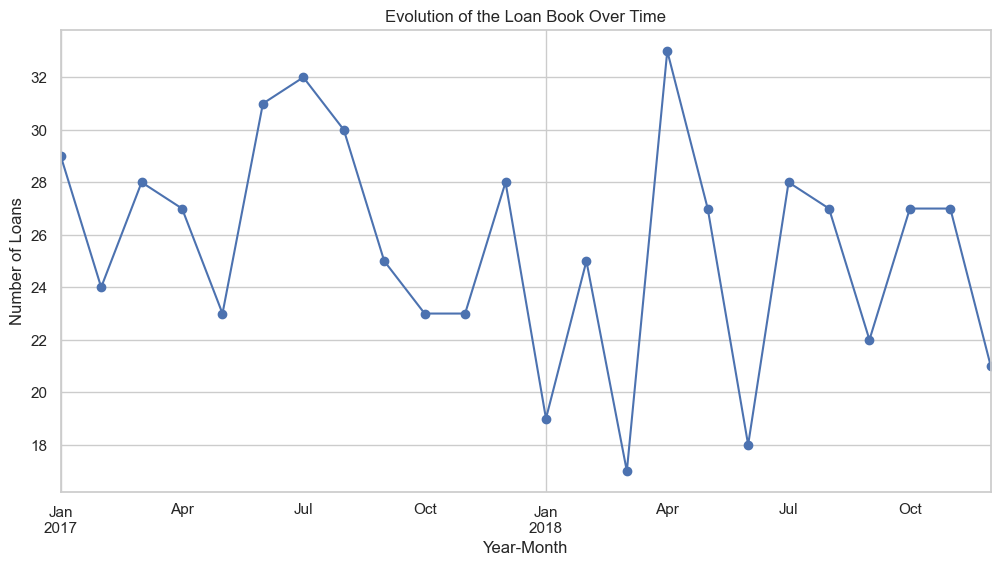

In [49]:
# Extract month and year from 'application_date'
df['YearMonth'] = df['application_date'].dt.to_period('M')

# Group by 'YearMonth' and count the number of loans
loan_evolution = df.groupby('YearMonth').size()

# Plotting
plt.figure(figsize=(12, 6))
loan_evolution.plot(marker='o')
plt.title('Evolution of the Loan Book Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Loans')
plt.grid(True)
plt.show()

### Can we identify distinct groups of borrowers?

To identify distinct groups of borrowers, we will use clustering algorithms. One commonly used algorithm is K-Means clustering.

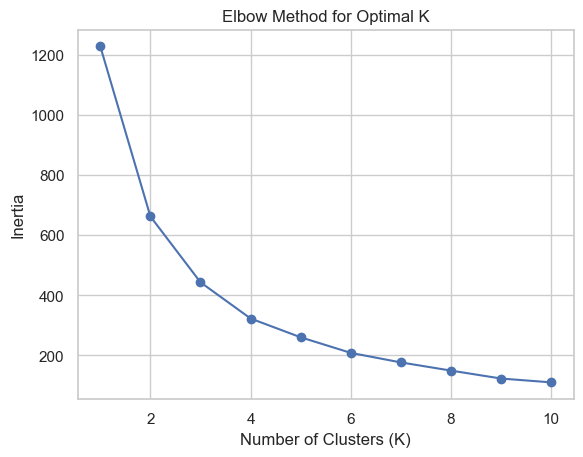

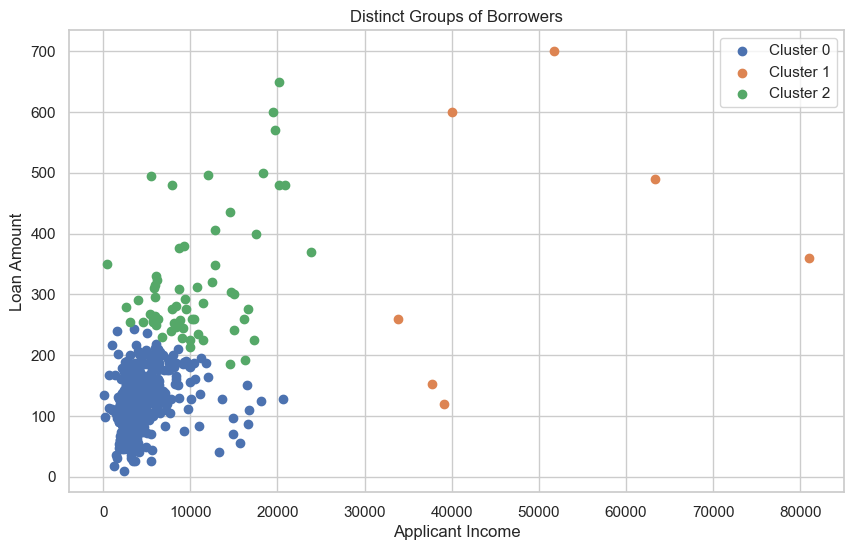

In [54]:
# Here we will perform K-Means clustering on 'ApplicantIncome' and 'LoanAmount', using the Elbow method to determine
# the optimal number of clusters, and then visualizes the distinct groups of borrowers based on these features


# 'ApplicantIncome' and 'LoanAmount' are our relevant features for clustering
features_for_clustering = ['ApplicantIncome', 'LoanAmount']

# Select relevant columns
selected_features = df[features_for_clustering]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Use the Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters and fit the model
optimal_k = 3  # Choose the number based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['ApplicantIncome'], cluster_data['LoanAmount'], label=f'Cluster {cluster}')

plt.title('Distinct Groups of Borrowers')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

### Which factors predict who gets funded?

To identify factors that predict who gets funded, we will use machine learning techniques, specifically logistic regression with class weights and F1 score.

In [78]:
#Mapping columns containing strings
mapping = {
    'Gender': {'Male': 0, 'Female': 1},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Semiurban': 1, 'Urban': 2, 'Rural': 3},
    'Loan_Status': {'Y': 1, 'N': 0},
    'county': {'Nairobi': 1, 'Kiambu': 2, 'Machakos': 3, 'Mombasa':4},
    'Dependents': {0: 0, 1: 1, 2: 2, '3+': 3}
}

df.replace(mapping, inplace=True)

In [ ]:
# Drop the 'Loan_ID' column
df.drop('Loan_ID', axis=1, inplace=True)

# Convert 'application_date' to a numeric representation (e.g., number of days since January 1st, 2017)
df['application_date'] = (df['application_date'] - pd.to_datetime('2017-01-01')).dt.days

# Drop the 'YearMonth' column
df.drop('YearMonth', axis=1, inplace=True)

In [91]:
# Split the data into training and testing sets
X_1=df.drop('Loan_Status',axis=1)
y_1=df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.20, random_state=42)

In [94]:
# Define class weights as a dictionary
class_weights = {0: 0.7, 1: 0.3}

# Create a logistic regression model with class weights
lr = LogisticRegression(class_weight=class_weights, max_iter=100)

# Fit the model and make predictions
pred = lr.fit(X_train, y_train).predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, pred)

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.6933333333333334


In [95]:
pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [98]:
# calculating the confusion matrix using scikit-learn

cm = confusion_matrix(pred, y_test)
cm

array([[25, 28],
       [18, 52]], dtype=int64)

In [99]:
#  The actual outcomes (labels) corresponding to the input data points that were set aside for testing the 
# model's performance

y_test

350    1
377    1
163    1
609    1
132    1
      ..
231    1
312    1
248    1
11     1
333    1
Name: Loan_Status, Length: 123, dtype: int64

<Axes: >

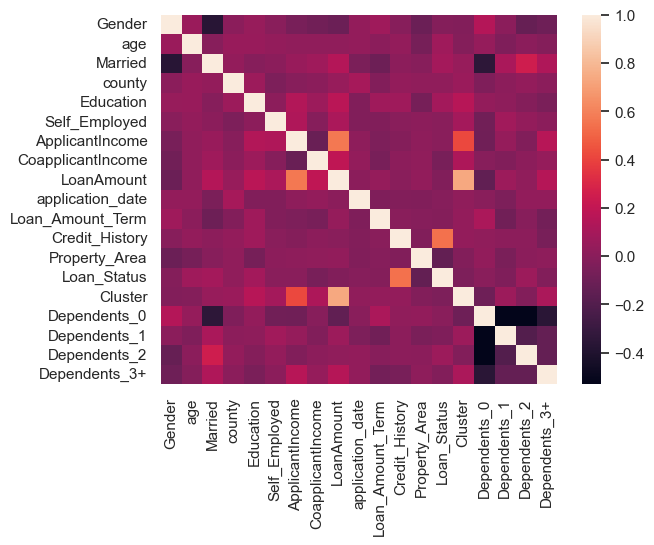

In [100]:
# A heatmap showing the patterns of association between different variables in the dataset

sns.heatmap(df.corr())

### New Measures

In [5]:
# 1. Loan approval rate:

# Calculate overall loan approval rate
total_applications = len(df)
approved_applications = len(df[df['Loan_Status'] == 'Y'])
approval_rate_overall = (approved_applications / total_applications) * 100

print(f"Overall Loan Approval Rate: {approval_rate_overall:.2f}%")

# Calculate loan approval rate by Gender
approval_rate_by_gender = df.groupby('Gender')['Loan_Status'].value_counts(normalize=True).loc[:, 'Y'] * 100
print("\nLoan Approval Rate by Gender:")
print(approval_rate_by_gender)

# Calculate loan approval rate by Credit History
approval_rate_by_credit_history = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).loc[:, 'Y'] * 100
print("\nLoan Approval Rate by Credit History:")
print(approval_rate_by_credit_history)

Overall Loan Approval Rate: 68.73%

Loan Approval Rate by Gender:
Gender
Female    66.964286
Male      69.325153
Name: proportion, dtype: float64

Loan Approval Rate by Credit History:
Credit_History
0.0     7.865169
1.0    79.578947
Name: proportion, dtype: float64


In [6]:
# 2. Debt-to-income ratio:

df['Debt_Income_Ratio'] = df['LoanAmount'] / (df['ApplicantIncome'] + df['CoapplicantIncome'])

# Display the updated DataFrame
print(df[['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Debt_Income_Ratio']])

     LoanAmount  ApplicantIncome  CoapplicantIncome  Debt_Income_Ratio
0           NaN             5849                0.0                NaN
1         128.0             4583             1508.0           0.021015
2          66.0             3000                0.0           0.022000
3         120.0             2583             2358.0           0.024287
4         141.0             6000                0.0           0.023500
..          ...              ...                ...                ...
609        71.0             2900                0.0           0.024483
610        40.0             4106                0.0           0.009742
611       253.0             8072              240.0           0.030438
612       187.0             7583                0.0           0.024660
613       133.0             4583                0.0           0.029020

[614 rows x 4 columns]


In [7]:
# 3. Credit ranking:

# Create a new column for credit history categories
df['Credit_History_Category'] = df['Credit_History'].map({1: 'Good', 0: 'Bad'})

# Analyze differences in loan terms, age groups, and approval rates by credit history category
credit_history_analysis = df.groupby('Credit_History_Category').agg({
    'Loan_Amount_Term': 'mean',  # Mean loan term
    'age': ['mean', 'median'],    # Mean and median age
    'Loan_Status': lambda x: x.value_counts(normalize=True).get('Y', 0) * 100  # Approval rate
}).reset_index()

# Display the analysis results
print(credit_history_analysis)

  Credit_History_Category Loan_Amount_Term        age        Loan_Status
                                      mean       mean median    <lambda>
0                     Bad       341.927711  31.078652   31.0    7.865169
1                    Good       342.192719  32.000000   32.0   79.578947


### Segementation and Potential Behavioral Insights

In [8]:
# Income groups:

# Create income brackets
income_bins = [0, 5000, 10000, 15000, np.inf]
income_labels = ['0-5000', '5001-10000', '10001-15000', '15001+']

# Create a new column for income brackets
df['Income_Bracket'] = pd.cut(df['ApplicantIncome'], bins=income_bins, labels=income_labels, right=False)

# Analyze loan approval rates, loan amounts, and other variables across income brackets
income_analysis = df.groupby('Income_Bracket').agg({
    'Loan_Status': lambda x: x.value_counts(normalize=True).get('Y', 0) * 100,  # Approval rate
    'LoanAmount': 'mean',  # Mean loan amount
    'CoapplicantIncome': 'mean',  # Mean coapplicant income
    # Add more variables as needed for analysis
}).reset_index()

# Display the analysis results
print(income_analysis)

  Income_Bracket  Loan_Status  LoanAmount  CoapplicantIncome
0         0-5000    68.899522  117.009926        1824.688804
1     5001-10000    70.212766  180.912409        1348.000000
2    10001-15000    55.172414  230.592593         783.103448
3         15001+    73.076923  340.400000         767.192308


In [9]:
# Age groups:

# Create age brackets
age_bins = [18, 25, 35, 45]
age_labels = ['18-25', '26-35', '36-45']

# Create a new column for age brackets
df['Age_Bracket'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Analyze loan approval rates, loan amounts, and marital status across age brackets
age_analysis = df.groupby('Age_Bracket').agg({
    'Loan_Status': lambda x: x.value_counts(normalize=True).get('Y', 0) * 100,  # Approval rate
    'LoanAmount': 'mean',  # Mean loan amount
    'Married': lambda x: x.value_counts(normalize=True).get('Yes', 0) * 100,  # Percentage of married applicants
    # Add more variables as needed for analysis
}).reset_index()

# Display the analysis results
print(age_analysis)


  Age_Bracket  Loan_Status  LoanAmount    Married
0       18-25    66.887417  140.866197  66.887417
1       26-35    61.722488  150.148515  62.679426
2       36-45    75.545852  143.569507  64.317181


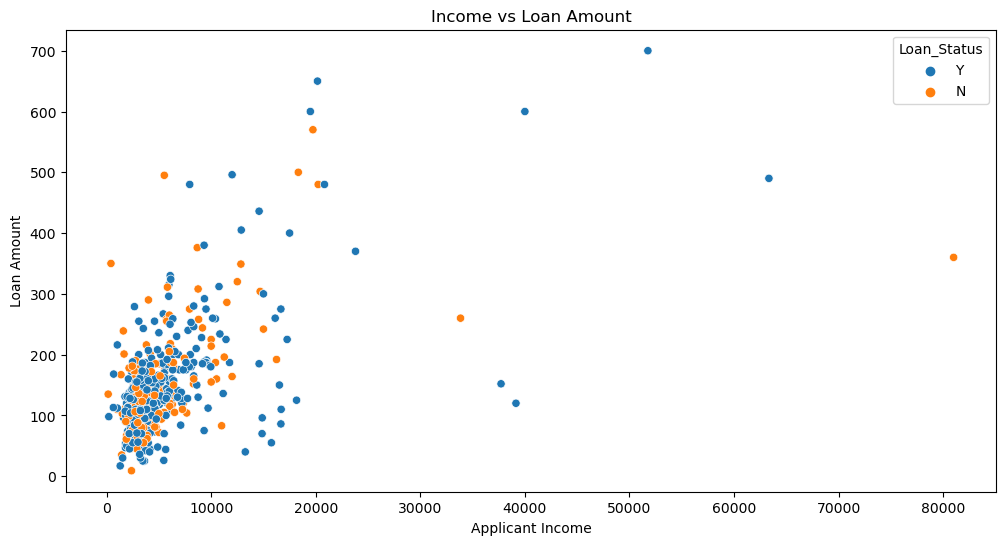

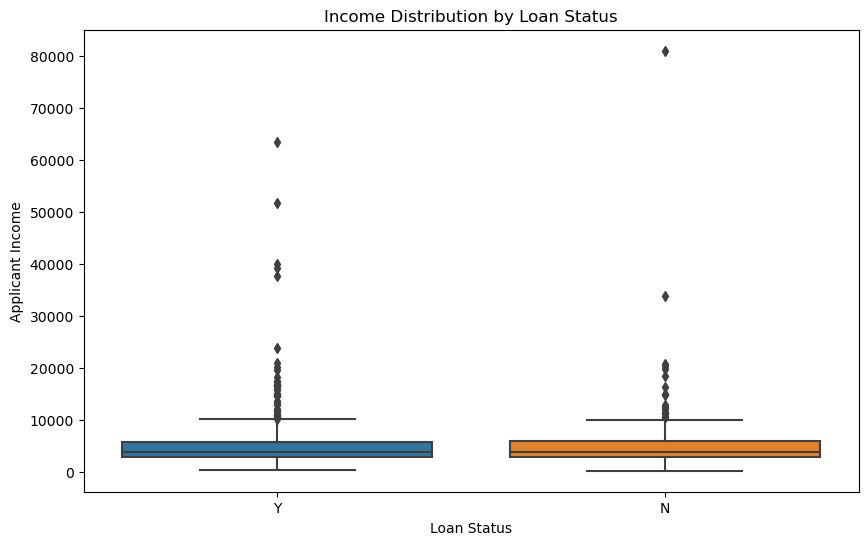

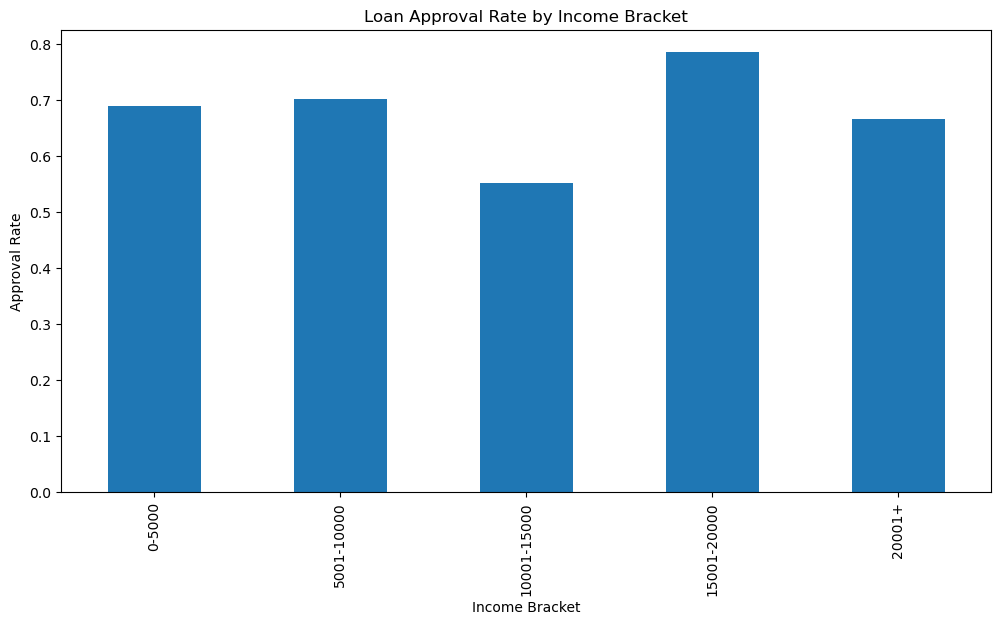

In [10]:
# Overconfidence bias:

# Scatter plot: Income vs Loan Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

# Box plot: Income distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

# Approval rate by income bracket
income_bins = [0, 5000, 10000, 15000, 20000, float('inf')]
income_labels = ['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001+']
df['Income_Bracket'] = pd.cut(df['ApplicantIncome'], bins=income_bins, labels=income_labels, right=False)

approval_by_income = df.groupby('Income_Bracket')['Loan_Status'].value_counts(normalize=True).unstack()
approval_by_income['Y'].plot(kind='bar', figsize=(12, 6), title='Loan Approval Rate by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Approval Rate')
plt.show()